<a href="https://colab.research.google.com/github/Owusuk/Projects/blob/main/Data_Analytics_%26_Visualization_Exercise_12_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bankloan.csv to bankloan.csv


In [ ]:
BankL_pd = pd.read_csv("bankloan.csv")

In [ ]:
print("\n1. Checking and Reading the Data\n")

print(BankL_pd.head())


1. Checking and Reading the Data

   x1   x2   x3    x4   x5    x6     x7     x8   x9  x10  x11  x12      x13  \
0  21  2.0  0.0  12.0  2.0  50.0  100.0  0.086  NaN  1.0   12  4.0  0.58333   
1  25  2.0  0.0  12.0  NaN  56.0  100.0  0.200  1.0  1.0   12  4.0  0.58333   
2  20  2.0  1.0  12.0  2.0  50.0    NaN  0.180  1.0  1.0   12  4.0  0.58333   
3  37  2.0  1.0  12.0  NaN  60.0  100.0  0.169  1.0  1.0   12  4.0  0.58333   
4  11  2.0  1.0  12.0  NaN   NaN  100.0    NaN  1.0  1.0    6  4.0  0.75000   

       x14  x15  x16  x17  x18  x19  
0  0.08333    0    0  NaN  NaN    1  
1  0.08333    0    0  0.0  0.0    1  
2  0.08333    0    0  0.0  NaN    1  
3  0.08333    0    0  0.0  0.0    1  
4  0.08333    0    0  NaN  0.0    0  


In [ ]:
BankL_pd

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,21,2.0,0.0,12.0,2.0,50.0,100.0,0.086,NaN,1.0,12,4.0,0.58333,0.08333,0,0,NaN,NaN,1
1,25,2.0,0.0,12.0,NaN,56.0,100.0,0.200,1.000,1.0,12,4.0,0.58333,0.08333,0,0,0.0,0.000,1
2,20,2.0,1.0,12.0,2.0,50.0,NaN,0.180,1.000,1.0,12,4.0,0.58333,0.08333,0,0,0.0,NaN,1
3,37,2.0,1.0,12.0,NaN,60.0,100.0,0.169,1.000,1.0,12,4.0,0.58333,0.08333,0,0,0.0,0.000,1
4,11,2.0,1.0,12.0,NaN,NaN,100.0,NaN,1.000,1.0,6,4.0,0.75000,0.08333,0,0,NaN,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,69,3.0,0.0,1.0,NaN,NaN,0.0,0.991,1.087,1.0,144,NaN,0.08333,1.00000,1,1,NaN,0.437,1
1307,69,3.0,0.0,1.0,1.0,69.0,0.0,0.991,1.093,1.0,144,8.0,0.08333,1.00000,1,1,0.0,NaN,1
1308,69,3.0,NaN,1.0,1.0,69.0,0.0,0.991,1.441,1.0,144,5.0,0.08333,1.00000,1,1,NaN,NaN,1
1309,69,3.0,1.0,1.0,1.0,NaN,0.0,NaN,1.967,1.0,144,8.0,0.08333,1.00000,1,1,0.0,NaN,1


### Boxplots for the targe (Univariate) cols in bankloan data


2. Generating boxplots for bank loan data
2


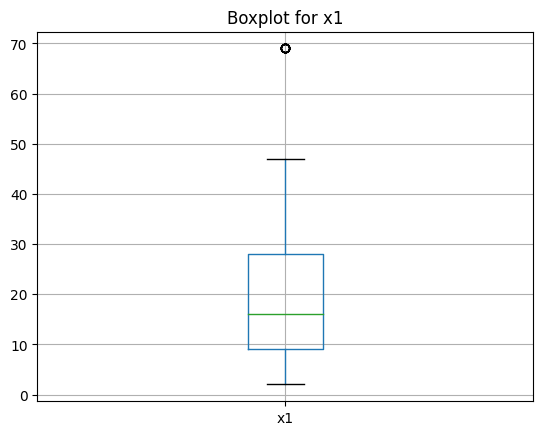

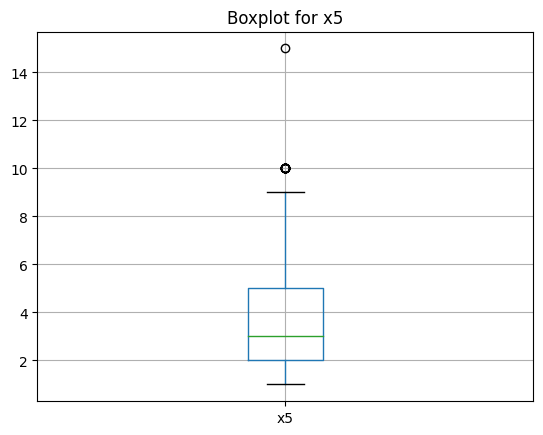

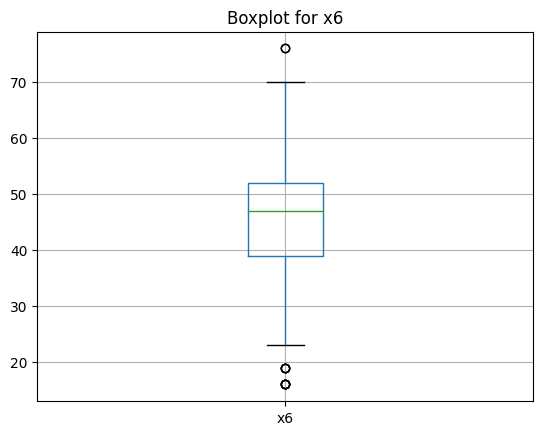

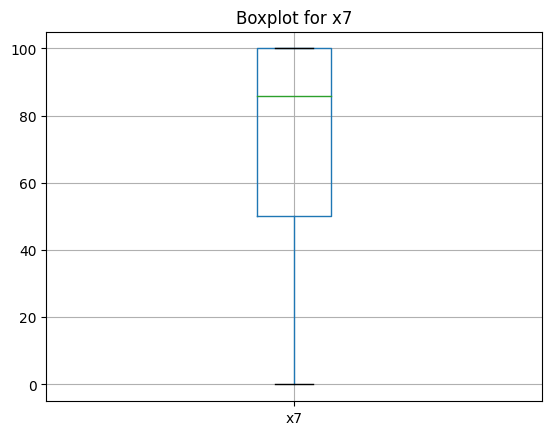

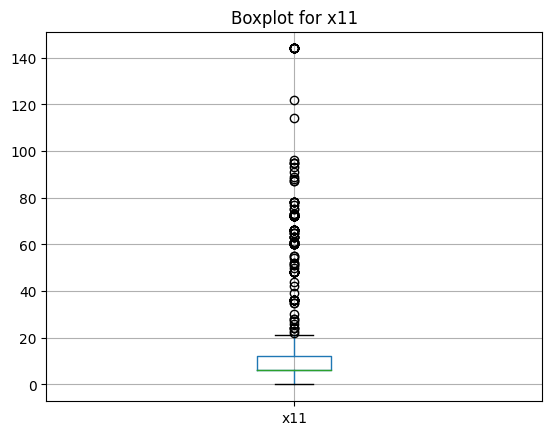

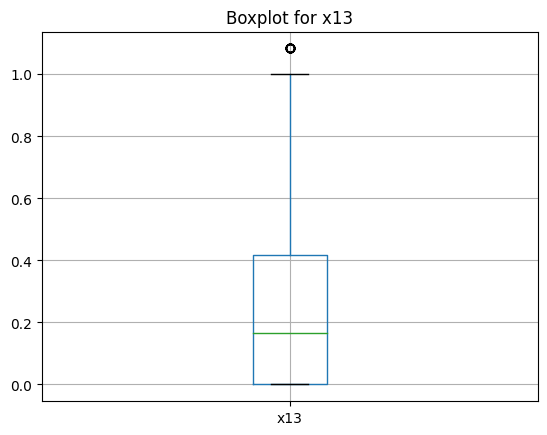

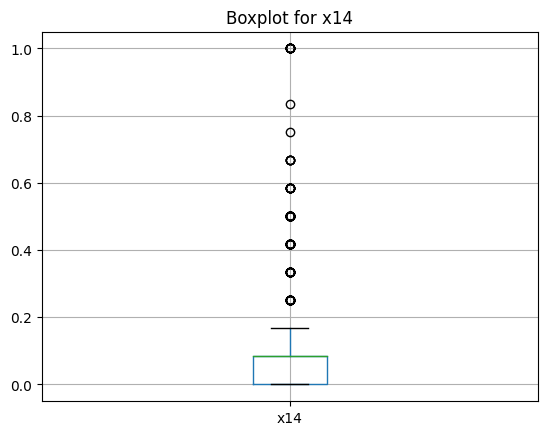

In [ ]:
print("\n2. Generating boxplots for bank loan data\n2")
Cols = ['x1', 'x5', 'x6', 'x7', 'x11', 'x13', 'x14']

for col in Cols:
  boxplot = BankL_pd[col].to_frame().dropna().boxplot()
  plt.title("Boxplot for {0}".format(col))
  plt.show()


### Using Standard Scaler from SKLearn to predict Top 10 Outliers

In [ ]:
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, Normalizer, minmax_scale,)

from sklearn.cluster import DBSCAN

In [ ]:
print('\n3. Getting top 10 outliers from clusters\n3')
#scale the data to calculate distances
scaler = MinMaxScaler()
bankloanSeries = scaler.fit_transform(BankL_pd.fillna(0))

## Create Clusters from dataset
outlier_detection = DBSCAN(min_samples=2, eps=1.13)
clusters = outlier_detection.fit_predict(bankloanSeries)

## Trim dataframe to outliers as identified by cluster analysis

outliers = BankL_pd.iloc[(clusters == -1).nonzero()]

print(outliers)


3. Getting top 10 outliers from clusters
3
      x1   x2   x3   x4   x5    x6     x7     x8     x9  x10  x11  x12  \
262    9  NaN  1.0  2.0  3.0  42.0  100.0  0.833  1.129  1.0   60  5.0   
845   29  NaN  1.0  2.0  3.0  47.0    NaN    NaN  1.020  0.0   21  2.0   
847   29  2.0  0.0  2.0  3.0   NaN   58.0  0.161  1.009  0.0    3  2.0   
1129  31  NaN  NaN  NaN  3.0  38.0    NaN  1.000  1.000  NaN   12  4.0   
1132  13  3.0  0.0  2.0  1.0   NaN    1.0  1.000  3.438  1.0  114  NaN   
1177   8  3.0  0.0  2.0  2.0   NaN    NaN  0.998  3.736  0.0   48  4.0   
1247  22  3.0  1.0  NaN  6.0  46.0   90.0  0.643  3.166  1.0   77  8.0   
1248  22  NaN  1.0  1.0  NaN  46.0    NaN    NaN  7.557  NaN  122  8.0   
1285  19  NaN  NaN  NaN  NaN  28.0    NaN  0.621  1.040  NaN   60  4.0   
1304  69  3.0  0.0  1.0  1.0  69.0    0.0    NaN  1.052  NaN  144  8.0   

          x13      x14  x15  x16    x17    x18  x19  
262   0.08333  0.41667    0    0    NaN  0.000    1  
845   0.00000  0.08333    1    0 

In [ ]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.layers import Dense

In [ ]:
# build neural network around the data


# ### Building a neural network
print("\n4. Building a neural network\n4")
X_train = BankL_pd.drop(columns = ['x19'])
y_train = BankL_pd['x19']

# Create the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

# Evaluate the model
model.evaluate(X_train, y_train)



4. Building a neural network
4
Epoch 1/100
41/41 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.9443
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9443
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9443
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9443
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9443
Epoch 1

[nan, 0.9443173408508301]